**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

**Loading data**

In [ ]:
from keras.datasets import mnist
data = mnist.load_data()

**Dividing Train/Test data**

In [ ]:
(X_train, y_train), (X_test, y_test) = data
X_train[0].shape
X_train.shape

(60000, 28, 28)

**Plotting values in X_train**

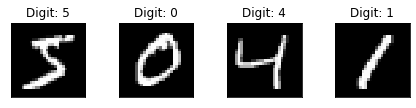

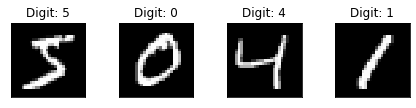

In [ ]:
fig = plt.figure()
for i in range(4):
  plt.subplot(2,4,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

Reshaping and normalizing data

In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


**Building a dense network**

In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import tensorflow as tf
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping


In [ ]:
epochs = 75
learning_rate = 0.002
decay_rate = learning_rate / epochs
input_dim = X_train.shape[1]

num_classes = 10



In [ ]:
def dense_model_adam():
  # Creating a Sequential Model and adding the layers
  model = Sequential()
  model.add(Dense(40, activation=tf.nn.relu))
  model.add(Flatten())
  model.add(Dense(20,activation=tf.nn.softmax))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation=tf.nn.sigmoid))

  model.add(Dense(num_classes,activation=tf.nn.softmax))

  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

  return model

In [ ]:
def exp_learning(epochs):
  lrate = learning_rate * np.exp(-decay_rate*epochs)
  return lrate

exp_model = dense_model()
lr_rate = LearningRateScheduler(exp_learning)


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

callbacks_list = [lr_rate,es]

In [ ]:
exp_history = exp_model.fit(X_train, Y_train,
                        batch_size=128,
                        epochs=epochs,
                        callbacks=callbacks_list,
                        verbose=1,
                        validation_data=(X_test, Y_test))

Epoch 1/75
469/469 [==============================] - 2s 3ms/step - loss: 1.8608 - accuracy: 0.4064 - val_loss: 1.2634 - val_accuracy: 0.5838
Epoch 2/75
469/469 [==============================] - 1s 3ms/step - loss: 1.2397 - accuracy: 0.4917 - val_loss: 0.8902 - val_accuracy: 0.6108
Epoch 3/75
469/469 [==============================] - 1s 3ms/step - loss: 1.0968 - accuracy: 0.5335 - val_loss: 0.7804 - val_accuracy: 0.7233
Epoch 4/75
469/469 [==============================] - 1s 3ms/step - loss: 0.9062 - accuracy: 0.7029 - val_loss: 0.5409 - val_accuracy: 0.8739
Epoch 5/75
469/469 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.7652 - val_loss: 0.3891 - val_accuracy: 0.9236
Epoch 6/75
469/469 [==============================] - 1s 3ms/step - loss: 0.5751 - accuracy: 0.8054 - val_loss: 0.3146 - val_accuracy: 0.9465
Epoch 7/75
469/469 [==============================] - 1s 3ms/step - loss: 0.4789 - accuracy: 0.8509 - val_loss: 0.2843 - val_accuracy: 0.9476
Epoch 

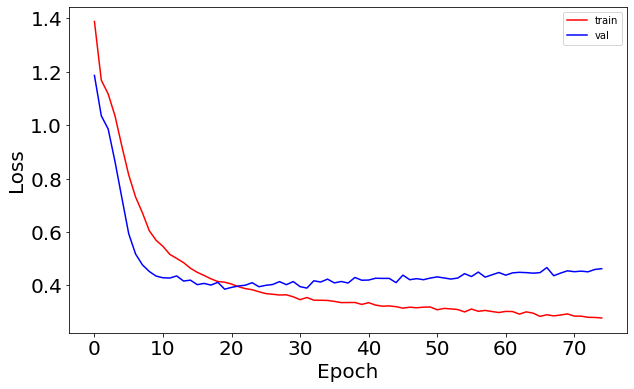

In [ ]:
#PLot for the model with constant learning rate
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(exp_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(exp_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

**What is the value of lr when loss shoots up?**

-> At 0.1